In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv("fraudTest.csv", encoding='latin1')

In [3]:
df_train = pd.read_csv("fraudTrain.csv", encoding='latin1')

In [4]:
df_test.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [5]:
df_train.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [6]:
df_train.shape

(1296675, 23)

In [7]:
df_test.shape

(555719, 23)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
df_train.duplicated().sum()

0

In [10]:
data = df_train.drop(columns=['Unnamed: 0','cc_num','street','trans_num','first','last'])
df_test = df_test.drop(columns=['Unnamed: 0','cc_num','street','trans_num','first','last'])

In [11]:
data.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [12]:
# % of test and train data
(1296675 * 100)/(555719+1296675)

69.99995681264353

__70% data is present in the train dataset and remaining 30% in the test dataset.__s

In [13]:
# Converting dob to age
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (pd.to_datetime('now') - data['dob']).dt.days / 365.25
data['age'] = data['age'].astype(int)
data = data.drop(columns = ['dob'])

In [14]:
data.head(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,36
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,46


In [15]:
df_test['dob'] = pd.to_datetime(df_test['dob'])
df_test['age'] = (pd.to_datetime('now') - df_test['dob']).dt.days / 365.25
df_test['age'] = df_test['age'].astype(int)
df_test = df_test.drop(columns = ['dob'])

In [16]:
data['trans_date'] = pd.DatetimeIndex(data['trans_date_trans_time']).date
data['trans_time'] = pd.DatetimeIndex(data['trans_date_trans_time']).time
data.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [17]:
data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,36,2019-01-01,00:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,46,2019-01-01,00:00:44
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,62,2019-01-01,00:00:51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,57,2019-01-01,00:01:16
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,38,2019-01-01,00:03:06


In [18]:
df_test['trans_date'] = pd.DatetimeIndex(df_test['trans_date_trans_time']).date
df_test['trans_time'] = pd.DatetimeIndex(df_test['trans_date_trans_time']).time
df_test.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   city        1296675 non-null  object 
 5   state       1296675 non-null  object 
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  object 
 11  unix_time   1296675 non-null  int64  
 12  merch_lat   1296675 non-null  float64
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  int64  
 15  age         1296675 non-null  int32  
 16  trans_date  1296675 non-null  object 
 17  trans_time  1296675 non-null  object 
dtypes: float64(5), int32(1

In [20]:
data.describe()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,5.022120e+01
std,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,1.738897e+01
min,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.900000e+01
25%,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,3.700000e+01
50%,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.800000e+01
75%,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.100000e+01
max,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.900000e+01


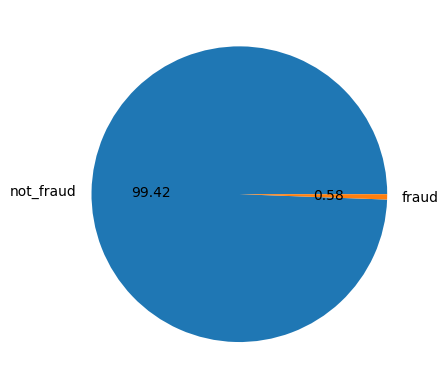

In [21]:
plt.pie(data['is_fraud'].value_counts(),labels = ['not_fraud','fraud'],autopct="%0.2f")
plt.show()

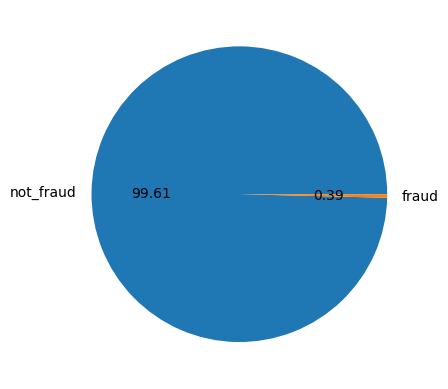

In [22]:
plt.pie(df_test['is_fraud'].value_counts(),labels = ['not_fraud','fraud'],autopct="%0.2f")
plt.show()

Both the datasets have high imbalnce of the target variable with the test dataset having slightly higher imbalance. At this point, lets keep the test data seperate. We will be building the model on the train dataset. 

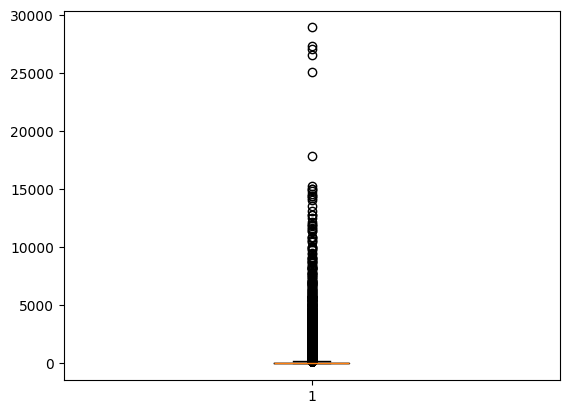

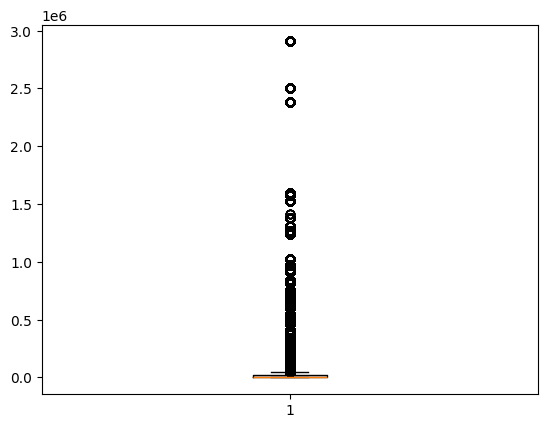

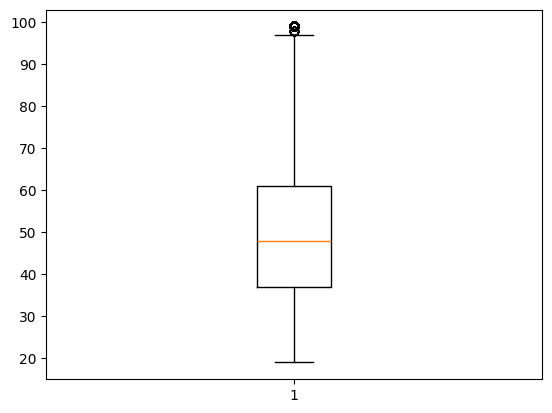

In [23]:
plt.boxplot(data.amt)
plt.show()
plt.boxplot(data.city_pop)
plt.show()
plt.boxplot(data.age)
plt.show()

The age column has no outliers while amt and city_pop stastically shows outliers. However, both amount and city population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

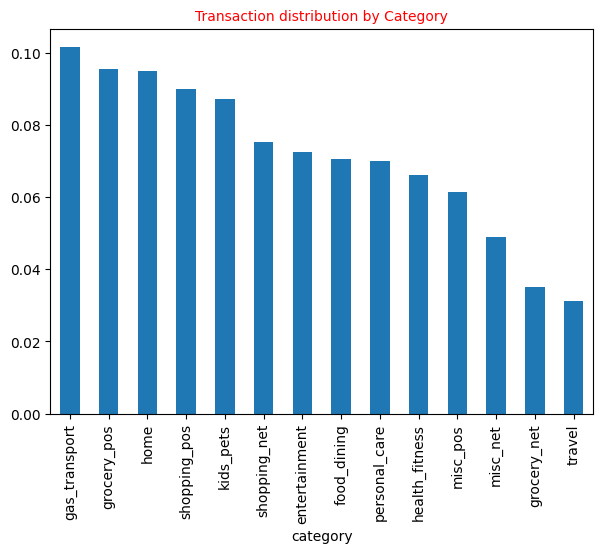

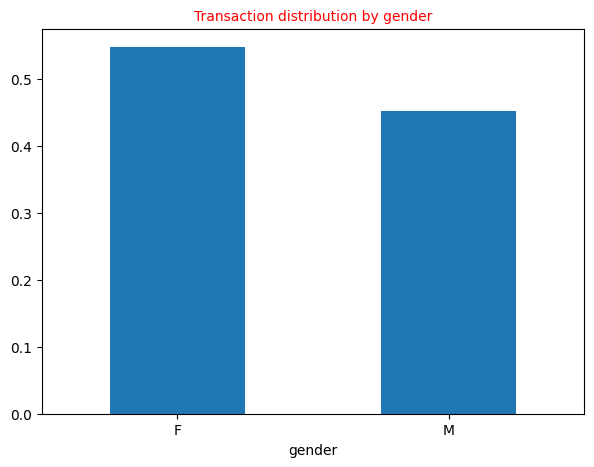

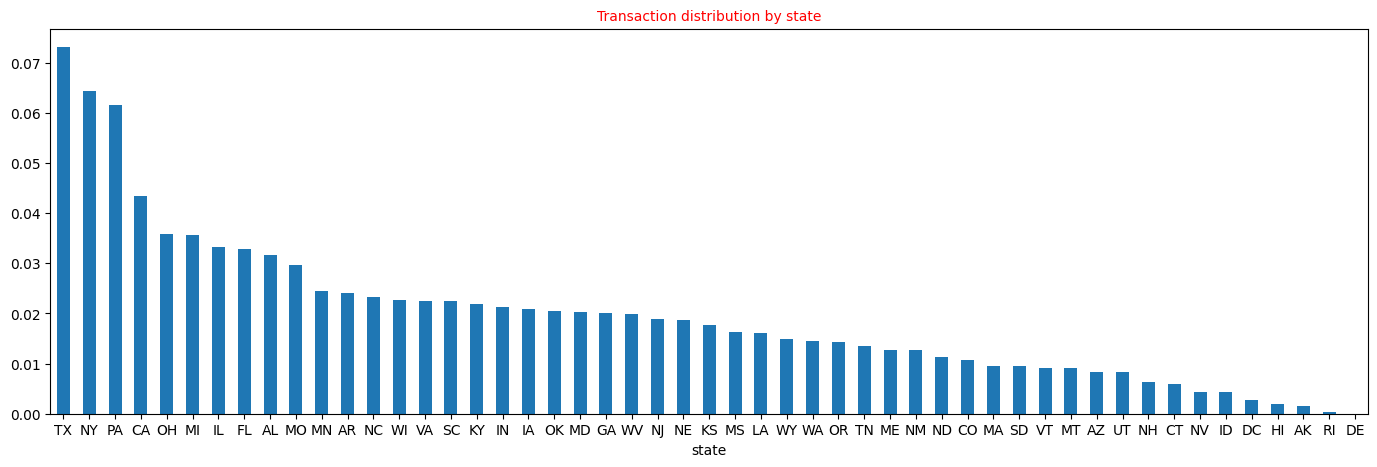

In [24]:
# Lets check the transaction distribution by Category, Gender and State variables
plt.figure(figsize = (7,5))
plt.title('Transaction distribution by Category', fontsize= 10, color = 'Red', fontweight = 100)
data.category.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (7,5))
plt.title('Transaction distribution by gender', fontsize= 10, color = 'Red', fontweight = 100)
data.gender.value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

plt.figure(figsize = (17,5))
plt.title('Transaction distribution by state', fontsize= 10, color = 'Red', fontweight = 100)
data.state.value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

__## Check for the behaviour of various columns against the is_fraud column__

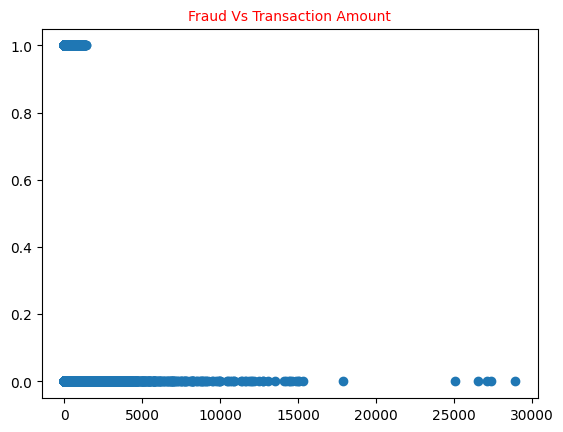

In [25]:
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red')
plt.scatter(data.amt, data.is_fraud)

As can be seen from above, frauds are happening in transactions with lower amount hence indicating there is a relation in them.

<Axes: title={'center': 'Distribution of Fraud Amount'}, ylabel='Count'>

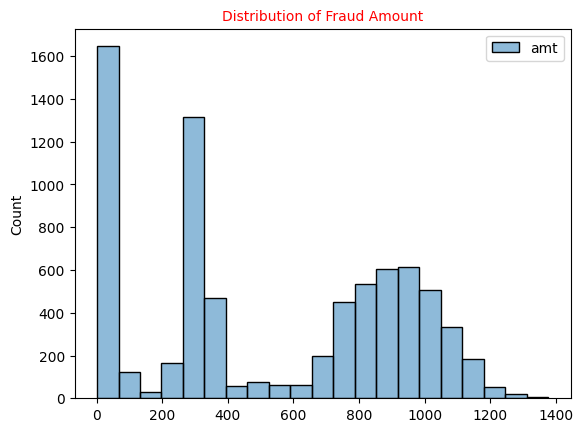

In [26]:
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red')
sns.histplot(data[data['is_fraud']==1][['amt']])

In [27]:
# Fraud transactions Vs merchant
# Total number of transactions per merchant
merch_tran_total = data.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

merchant
fraud_Abbott-Rogahn                 1844
fraud_Abbott-Steuber                1763
fraud_Abernathy and Sons            1751
fraud_Abshire PLC                   1895
fraud_Adams, Kovacek and Kuhlman     940
Name: is_fraud, dtype: int64

In [28]:
# Total fraud transactions per merchant
merch_tran_fraud_count = data[data.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud_count.head()

merchant
fraud_Rau and Sons       49
fraud_Cormier LLC        48
fraud_Kozey-Boehm        48
fraud_Doyle Ltd          47
fraud_Vandervort-Funk    47
Name: count, dtype: int64

In [29]:
# Percent of fraud transactions per merchant
fraud_perc = merch_tran_fraud_count/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

merchant
fraud_Kozey-Boehm                        2.572347
fraud_Herman, Treutel and Dickens        2.538462
fraud_Kerluke-Abshire                    2.230686
fraud_Brown PLC                          2.210884
fraud_Goyette Inc                        2.161606
                                           ...   
fraud_Ritchie, Bradtke and Stiedemann         NaN
fraud_Romaguera and Sons                      NaN
fraud_Schroeder Group                         NaN
fraud_Schroeder, Wolff and Hermiston          NaN
fraud_Wiegand-Lowe                            NaN
Length: 693, dtype: float64

Baring a few merchants, most of them have equal distribution of transactions and hence this field may play important role in the model. Changing the alphabetic values to numeric as models expects numeric data.



In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder = LabelEncoder()

In [32]:
data['merchant'] = label_encoder.fit_transform(data['merchant'])
df_test['merchant'] = label_encoder.fit_transform(df_test['merchant'])

In [33]:
data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,514,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,36,2019-01-01,00:00:18
1,241,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,46,2019-01-01,00:00:44
2,390,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,62,2019-01-01,00:00:51
3,360,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,57,2019-01-01,00:01:16
4,297,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,38,2019-01-01,00:03:06


In [34]:
# Fraud transactions Vs City
# Percent distribution of fraud based on city
city_tran_total =data.sort_values('city').groupby('city').count()['is_fraud']
city_tran_total.head()

city
Achille     532
Acworth    2097
Adams       516
Afton      2035
Akron       511
Name: is_fraud, dtype: int64

In [35]:
city_tran_fraud = data[data.is_fraud == 1]['city'].value_counts()
fraud_perc = city_tran_fraud/ city_tran_total * 100
fraud_perc.sort_values(ascending=False)

city
East China     100.0
Walkertown     100.0
Freeport       100.0
Gaines         100.0
Granbury       100.0
               ...  
Williams         NaN
Wilton           NaN
Woods Cross      NaN
Woodville        NaN
Zavalla          NaN
Length: 894, dtype: float64

As can be seen, few cities have all transactions as fraud. All these cities have low transaction rate. There are 58 such cities.

In [36]:
# Transforming alphabetic city data into numeric to be processed by the model
data.city = label_encoder.fit_transform(data.city)
df_test.city = label_encoder.fit_transform(df_test.city)

In [37]:
data.head(2)

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,514,misc_net,4.97,F,526,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,36,2019-01-01,00:00:18
1,241,grocery_pos,107.23,F,612,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,46,2019-01-01,00:00:44


In [38]:
# category Vs fraud
# Percent distribution of fraud based on transaction category
cat_tran_total = data.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = data[data.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
fraud_perc

category
entertainment     0.247835
food_dining       0.165098
gas_transport     0.469394
grocery_net       0.294817
grocery_pos       1.409761
health_fitness    0.154869
home              0.160825
kids_pets         0.211439
misc_net          1.445795
misc_pos          0.313853
personal_care     0.242403
shopping_net      1.756149
shopping_pos      0.722538
travel            0.286370
dtype: float64

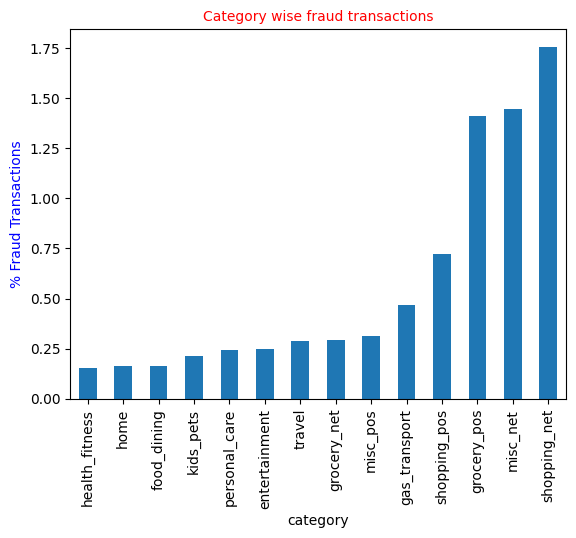

In [39]:
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()

In [40]:
data.category = label_encoder.fit_transform(data.category)
df_test.category = label_encoder.fit_transform(df_test.category)

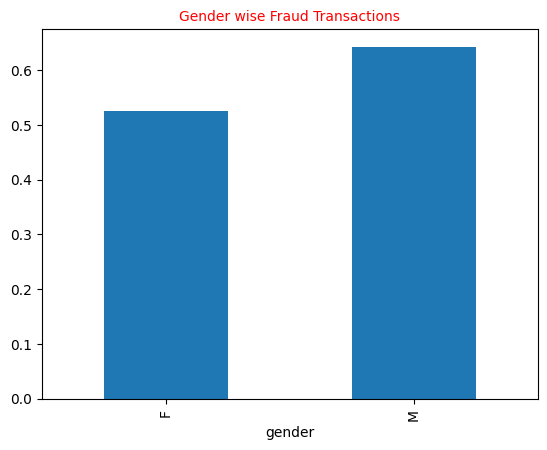

In [41]:
# Gender Vs Fraud
# Percent distribution of fraud based on Gender
gen_tran_total = data.sort_values('gender').groupby('gender').count()['is_fraud']
gen_tran_fraud = data[data.is_fraud == 1]['gender'].value_counts()
fraud_perc = gen_tran_fraud/ gen_tran_total * 100
plt.title('Gender wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
fraud_perc.sort_values().plot.bar()
plt.show()


In [42]:
# Transforming alphabetic gender data into numeric to be processed by the model
data.gender = data.gender.map({'M': 1, "F": 0})
df_test.gender = df_test.gender.map({'M': 1, "F": 0})

In [43]:
state_tran_total = data.sort_values('state').groupby('state').count()['is_fraud']
state_tran_fraud = data[data.is_fraud == 1]['state'].value_counts()
fraud_perc = state_tran_fraud/ state_tran_total * 100
fraud_perc

state
AK      1.698113
AL      0.524531
AR      0.517236
AZ      0.343547
CA      0.578424
CO      0.814121
CT      0.207738
DC      0.581234
DE    100.000000
FL      0.658527
GA      0.560181
HI      0.273544
IA      0.526218
ID      0.198377
IL      0.573384
IN      0.514866
KS      0.678379
KY      0.544337
LA      0.434057
MA      0.557531
MD      0.599397
ME      0.720994
MI      0.515665
MN      0.652709
MO      0.497357
MS      0.542760
MT      0.272248
NC      0.492302
ND      0.385500
NE      0.744786
NH      0.712733
NJ      0.479616
NM      0.499787
NV      0.838238
NY      0.664663
OH      0.690620
OK      0.536163
OR      0.801204
PA      0.573597
RI      2.727273
SC      0.661185
SD      0.600454
TN      0.797539
TX      0.504870
UT      0.570147
VA      0.676923
VT      0.611829
WA      0.507292
WI      0.555026
WV      0.568292
WY      0.569299
dtype: float64

This is very significant. While the number of transactions in DE is very less, all of them are fraud transaction. Rest all the states have very low fraud transaction.

In [44]:
# Transforming alphabetic state data into numeric to be processed by the model
data.state = label_encoder.fit_transform(data.state)
df_test.state = label_encoder.fit_transform(df_test.state)

In [45]:
data.head(2)

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,36,2019-01-01,00:00:18
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,46,2019-01-01,00:00:44


In [46]:
# Job Vs Fraud
# Percent distribution of fraud based on Job
job_tran_total = data.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = data[data.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

job
Armed forces technical officer       100.000000
Engineer, site                       100.000000
Information officer                  100.000000
Legal secretary                      100.000000
Industrial buyer                     100.000000
Careers adviser                      100.000000
Homeopath                            100.000000
Broadcast journalist                 100.000000
Personnel officer                    100.000000
Forest/woodland manager              100.000000
Sales promotion account executive    100.000000
Air traffic controller               100.000000
Contracting civil engineer           100.000000
Ship broker                          100.000000
Solicitor                            100.000000
Accountant, chartered                100.000000
Dancer                               100.000000
Warehouse manager                    100.000000
Veterinary surgeon                   100.000000
Lawyer                                 5.185185
dtype: float64

There seems certain jobs that have real high % of fraud transactions.

In [47]:
data.job= label_encoder.fit_transform(data.job)

In [48]:
df_test.job= label_encoder.fit_transform(df_test.job)

In [49]:
data.head(2)

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0,36,2019-01-01,00:00:18
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0,46,2019-01-01,00:00:44


In [50]:
city_pop_tran_total = data.sort_values('city_pop').groupby('city_pop').count()['is_fraud']
city_pop_tran_fraud = data[data.is_fraud == 1]['city_pop'].value_counts()
fraud_perc = city_pop_tran_fraud/ city_pop_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

city_pop
5505      100.0
1888      100.0
18799     100.0
19803     100.0
19880     100.0
20133     100.0
98816     100.0
198659    100.0
40470     100.0
4984      100.0
4870      100.0
1439      100.0
67100     100.0
64438     100.0
4431      100.0
4299      100.0
28506     100.0
6063      100.0
478404    100.0
4046      100.0
dtype: float64

Cities with less population, tends to have more fraud cases.

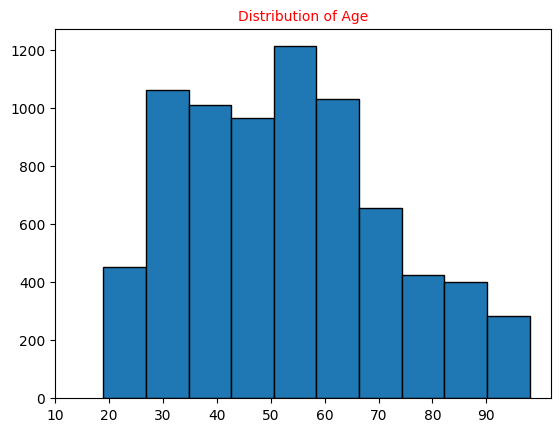

In [51]:
# Fraud Vs Age
temp = data[data.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

So, people in age group 50 to 60 tends to be slightly more victims of fraud.

In [52]:
data.head(2)

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0,36,2019-01-01,00:00:18
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0,46,2019-01-01,00:00:44


In [53]:
# Fraud Vs Zip
zip_tran_total = data.sort_values('zip').groupby('zip').count()['is_fraud']
zip_tran_fraud = data[data.is_fraud == 1]['zip'].value_counts()
fraud_perc = zip_tran_fraud/ zip_tran_total * 100
fraud_perc.sort_values(ascending=False).head(25)

zip
77027    100.0
75246    100.0
11944    100.0
74108    100.0
11763    100.0
11747    100.0
32065    100.0
61364    100.0
28412    100.0
89109    100.0
10954    100.0
10553    100.0
16041    100.0
10533    100.0
16214    100.0
47842    100.0
10018    100.0
72135    100.0
90240    100.0
23117    100.0
43723    100.0
70065    100.0
12207    100.0
78208    100.0
78644    100.0
dtype: float64

In [54]:
data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0,36,2019-01-01,00:00:18
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0,46,2019-01-01,00:00:44
2,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0,62,2019-01-01,00:00:51
3,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0,57,2019-01-01,00:01:16
4,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0,38,2019-01-01,00:03:06


In [55]:
# Fraud Vs lat
lat_tran_total = data.sort_values('lat').groupby('lat').count()['is_fraud']
lat_tran_fraud = data[data.is_fraud == 1]['lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

lat
66.6933    100.0
35.0271    100.0
42.2008    100.0
35.4359    100.0
30.5471    100.0
dtype: float64


As is evident from above stats, there are perticular latitudes codes that have 100% frauds.

In [56]:
# Fraud Vs long
long_tran_total = data.sort_values('long').groupby('long').count()['is_fraud']
long_tran_fraud = data[data.is_fraud == 1]['long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

long
-83.8855    100.0
-88.9307    100.0
-76.2701    100.0
-81.7742    100.0
-88.4927    100.0
dtype: float64

In [57]:
# Fraud Vs merch_lat
lat_tran_total = data.sort_values('merch_lat').groupby('merch_lat').count()['is_fraud']
lat_tran_fraud = data[data.is_fraud == 1]['merch_lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

merch_lat
19.425114    100.0
40.920282    100.0
40.940052    100.0
40.934939    100.0
40.934619    100.0
dtype: float64

In [58]:
# Fraud Vs merch_long
long_tran_total = data.sort_values('merch_long').groupby('merch_long').count()['is_fraud']
long_tran_fraud = data[data.is_fraud == 1]['merch_long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

merch_long
-166.550779    100.0
-81.993885     100.0
-81.998380     100.0
-81.999852     100.0
-82.003288     100.0
dtype: float64

There are multiple demographies - Zip, City, States, Latitudes, Longitudes and Job types that have only Fraud transactions.
Even though they have 100% frauds, the number of transactions is very low. For Example State DE had only 9 transactions in 2 years. Hence, it is very less likely to impact the model

In [59]:
data.head(2)

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0,36,2019-01-01,00:00:18
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0,46,2019-01-01,00:00:44


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  int32  
 1   category    1296675 non-null  int32  
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  int64  
 4   city        1296675 non-null  int32  
 5   state       1296675 non-null  int32  
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  int32  
 11  unix_time   1296675 non-null  int64  
 12  merch_lat   1296675 non-null  float64
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  int64  
 15  age         1296675 non-null  int32  
 16  trans_date  1296675 non-null  object 
 17  trans_time  1296675 non-null  object 
dtypes: float64(5), int32(6

In [61]:
data['trans_date'] = pd.to_datetime(data['trans_date'])

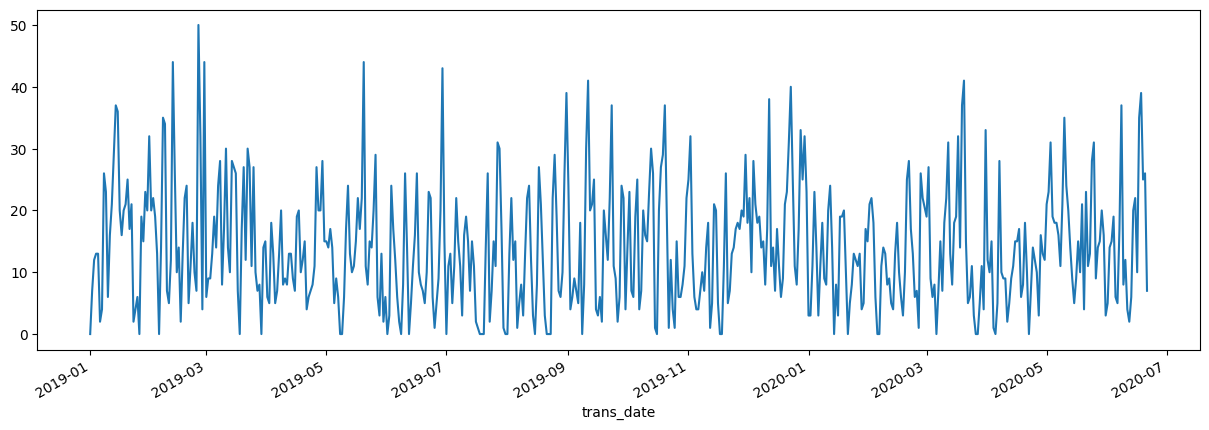

In [62]:
plt.figure(figsize=[15,5])
data.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

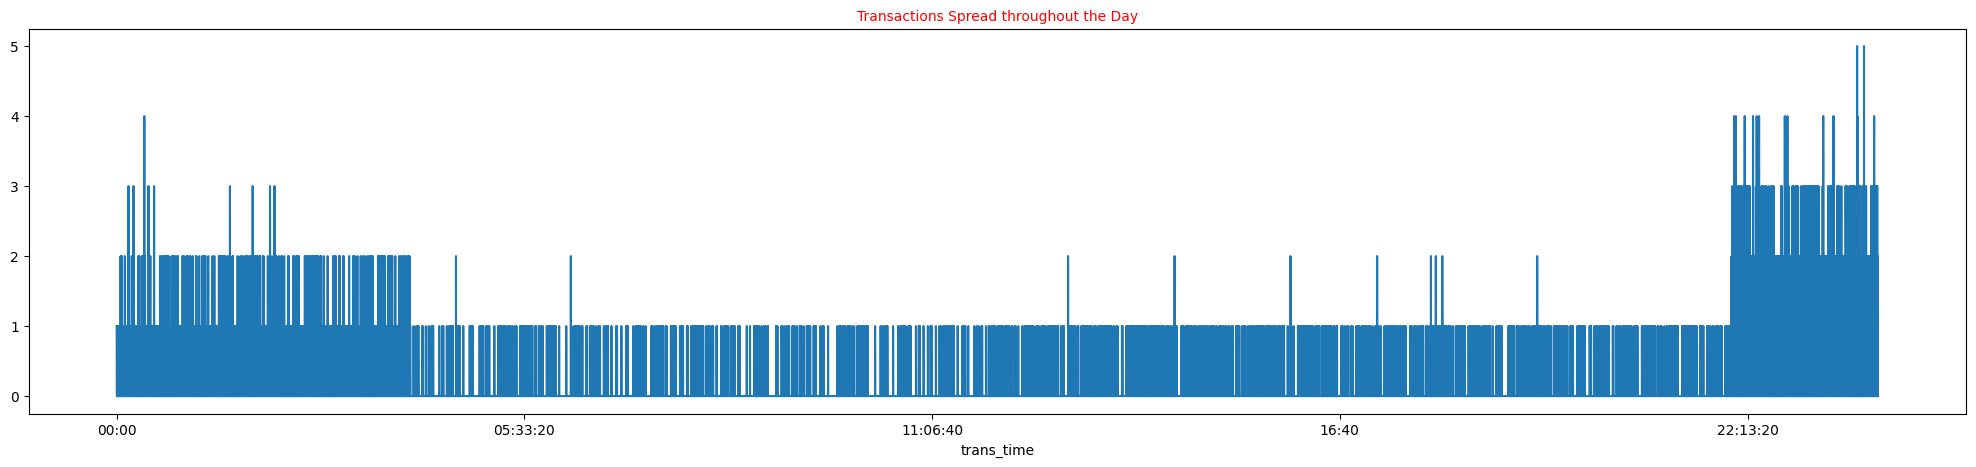

In [63]:
# Fraud Vs trans_time
import datetime as dt
data.trans_date = data.trans_date.map(dt.datetime.toordinal)
plt.figure(figsize=[25,5])
plt.title('Transactions Spread throughout the Day', fontsize= 10, color = 'Red', fontweight = 100)
data.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

So, late nights and early mornings are the most prone time for frauds. Highest frequency of frauds is between 10 pm to 12 am. 12 am to 4:00 am also shows very high frequency of fraud transactions.

In [64]:
# Converting trans_time into seconds
data.trans_time = pd.to_datetime(data.trans_time,format='%H:%M:%S')
data.trans_time = 3600 * pd.DatetimeIndex(data.trans_time).hour + 60 * pd.DatetimeIndex(data.trans_time).minute + pd.DatetimeIndex(data.trans_time).second

In [65]:
data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0,36,737060,18
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0,46,737060,44
2,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0,62,737060,51
3,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0,57,737060,76
4,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0,38,737060,186


In [66]:
# Similar date-time changes in test dataset
df_test['trans_date'] =  pd.to_datetime(df_test['trans_date'])
df_test.trans_date = df_test.trans_date.map(dt.datetime.toordinal)
df_test.trans_time = pd.to_datetime(df_test.trans_time,format='%H:%M:%S')
df_test.trans_time = 3600 * pd.DatetimeIndex(df_test.trans_time).hour + 60 * pd.DatetimeIndex(df_test.trans_time).minute + pd.DatetimeIndex(df_test.trans_time).second

In [67]:
data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0,36,737060,18
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0,46,737060,44
2,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0,62,737060,51
3,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0,57,737060,76
4,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0,38,737060,186


## Model Building

In [68]:
features = ['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
        'age', 'trans_date', 'trans_time']


# X = df_train[features].set_index("transaction_id")
X = data[features]
y = data['is_fraud']

print('X shape:{}\ny shape:{}'.format(X.shape,y.shape))

X shape:(1296675, 17)
y shape:(1296675,)


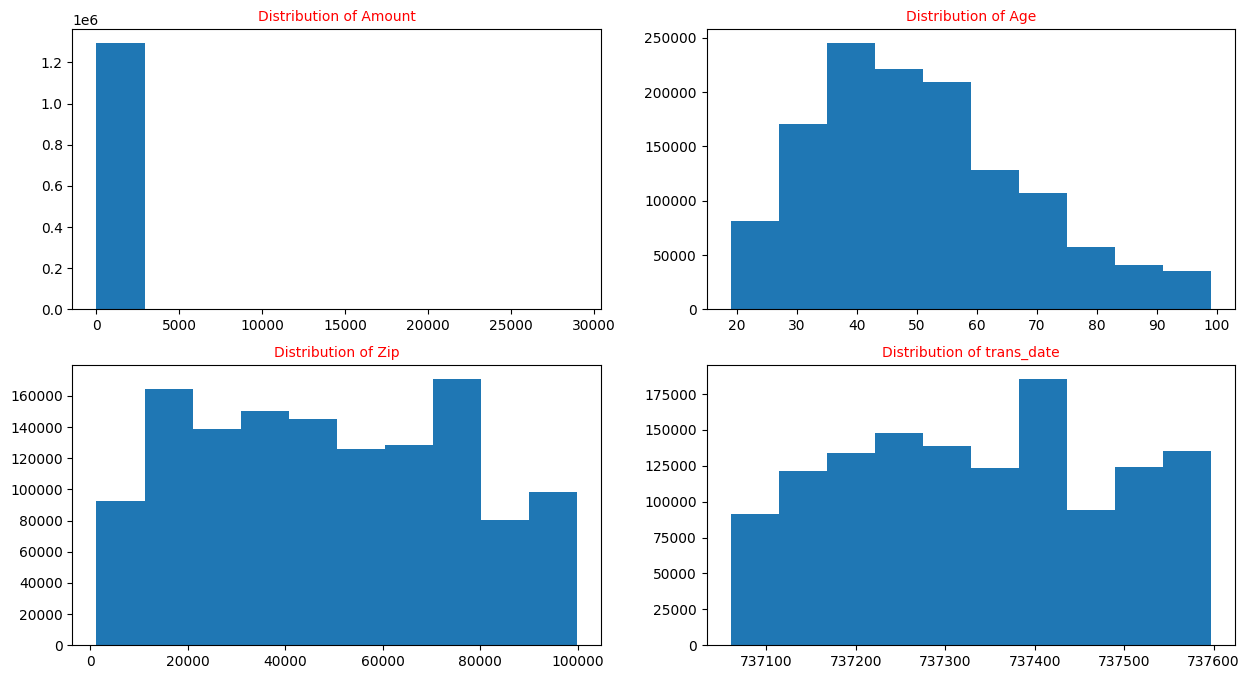

In [69]:
# Check distribution of few variables
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.trans_date)
plt.show()

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Lets try various scalers available in Scikit library. At optimum time, will finalize one.
# Based on various test results, QuantileTransformer with Gaussian distribution seems best suited.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
# scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = PowerTransformer()
scaler = QuantileTransformer(output_distribution='normal')
#scaler = RobustScaler()

In [72]:
X = scaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [75]:
dcstree = DecisionTreeClassifier(random_state=42)
dcstree.fit(X_train, y_train)
y_pred = dcstree.predict(X_test)

<Axes: >

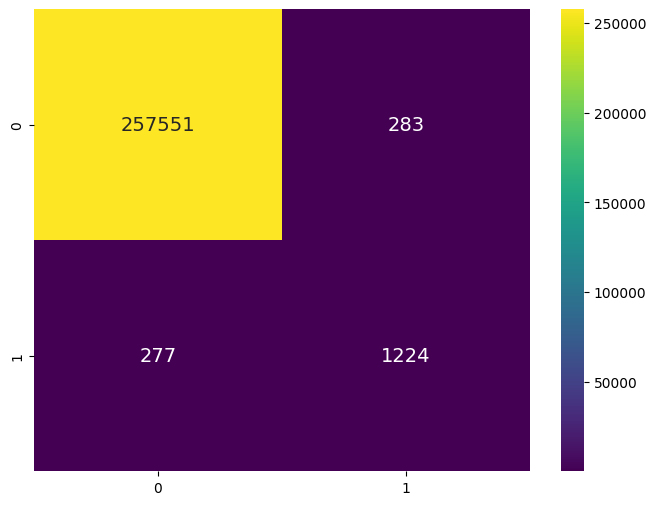

In [76]:
fig = plt.figure(figsize=(8,6))
cfs_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))

In [77]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
print("accuracy =",accuracy)
print("precision =",precision)

accuracy = 0.9978406308442748
precision = 0.8122096881220969


In [78]:
rf_random = RandomForestClassifier(max_features='sqrt', n_estimators=100, random_state=41, n_jobs=-1)
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
print("accuracy =",accuracy)
print("precision =",precision)

accuracy = 0.9984383133784487
precision = 0.9732297063903281


__Test Data Prediction__



In [80]:
scaled_test = scaler.fit_transform(df_test)

In [81]:
fraud_test = pd.DataFrame(scaled_test, columns=df_test.columns)


features = ['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
        'age', 'trans_date', 'trans_time']

#
# X = df_train[features].set_index("transaction_id")
fraud_test = fraud_test[features]

In [82]:
fraud_test

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age,trans_date,trans_time
0,-0.080379,0.724973,-1.520761,5.199338,-0.880888,0.783330,-0.583787,-0.805692,0.595437,1.513589,0.194422,-5.199338,-0.808751,0.574901,0.464007,-5.199338,-0.222587
1,1.084195,0.724973,-0.293440,-5.199338,-2.096521,1.252988,1.228607,0.193143,-1.239352,-1.199766,0.871679,-5.199338,0.003093,-1.237806,-0.895780,-5.199338,-0.222002
2,1.228607,-0.241963,-0.111286,-5.199338,-1.471555,0.269184,-1.435477,0.288750,1.629992,0.795322,0.105580,-5.199338,0.257332,1.476501,0.338834,-5.199338,-0.221000
3,-0.436240,0.519225,0.220611,5.199338,1.286702,-1.053106,-0.468203,-1.824556,0.605955,0.910873,1.023003,-5.199338,-1.824796,0.615214,-0.739737,-5.199338,-0.220312
4,-0.180377,5.199338,-1.452226,5.199338,-0.555462,-0.300542,0.041413,1.233962,0.198258,-0.493553,-0.229064,-5.199338,1.395509,0.141859,0.973449,-5.199338,-0.220250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.654930,-0.241963,-0.070256,5.199338,0.066541,-0.160010,0.430727,0.239380,-0.299230,-0.914679,1.733071,5.199338,0.117707,-0.257447,0.558392,5.199338,3.268906
555715,-0.280911,0.188033,1.048621,5.199338,-0.056486,1.053106,0.983573,-1.756055,-0.553999,0.738089,-0.212353,5.199338,-1.684683,-0.599678,-1.951050,5.199338,3.281191
555716,0.604448,0.188033,0.713773,-5.199338,-1.144896,1.517545,2.806711,1.705570,-1.625274,0.106841,0.295296,5.199338,1.784132,-1.673793,-0.333524,5.199338,3.321337
555717,-1.199766,5.199338,-0.828987,5.199338,0.168912,-0.807429,1.207532,1.349498,-1.407905,-1.733071,-1.252988,5.199338,1.275963,-1.448697,0.558392,5.199338,3.393867


In [83]:
y_pred  = rf_random.predict(fraud_test)
y_proba = rf_random.predict_proba(fraud_test)[:, 1]

C:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [84]:
df_test["Fraud_Proba"] = y_proba
df_test["Fraud_Predict"] = y_pred

In [85]:
result = df_test[["Fraud_Proba", "Fraud_Predict"]]
# Store result in a CSV file 
result.to_csv(r"./PredictFraud_Result.csv")

In [86]:
result

,Fraud_Proba,Fraud_Predict
0,0.00,0
1,0.00,0
2,0.00,0
3,0.00,0
4,0.00,0
...,...,...
555714,0.00,0
555715,0.02,0
555716,0.04,0
555717,0.06,0
